In [1]:
import numpy as np
import bayesflow as bf
import seaborn as sns
import matplotlib.pyplot as plt
from numba import njit

import sys
sys.path.append("../../src/")
from helpers import sample_ddm, CollapsingDDM, NeuralApproximator
from configurations import model_configs
from likelihood import sample_ddm_no_constraint_trial, sample_ddm_ndt_constraint_trial

2025-01-04 13:50:24.847324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 13:50:24.847363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 13:50:24.849003: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 13:50:24.858399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-04 13:50:27.762030: W tensorflow/comp

## Hyperbolic No Constraints

In [8]:
model = CollapsingDDM(model_configs['hyperbolic_ddm_no_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the hyperbolic_ddm_no_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 409, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Could not determine shape of simulation non-batchable context. Type appears to be non-array: <class 'int'>,                                    so make sure your input configurator takes cares of that!
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


### Prior Push Forward Checks

In [9]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 6.72 s, sys: 0 ns, total: 6.72 s
Wall time: 298 ms


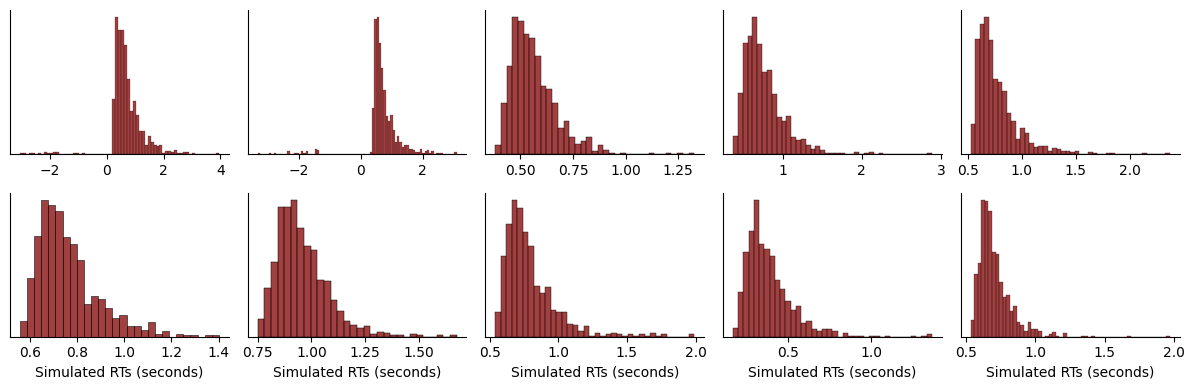

In [10]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [11]:
history = approximator.run()

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

2025-01-03 13:02:39.718868: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8b382604f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-03 13:02:39.718911: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2025-01-03 13:02:39.724478: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-03 13:02:39.744511: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1735905759.836449 2079736 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/1000 [00:00<?, ?it/s]

### Validation

In [3]:
NUM_VALIDATION_SIMS = 100000
NUM_POST_SAMPLES = 1000
NUM_OBS = 500

In [27]:
v = np.random.uniform(0, 3, NUM_VALIDATION_SIMS)
a0 = np.random.uniform(1.5, 4, NUM_VALIDATION_SIMS)
lamda = np.random.uniform(0.1, 2, NUM_VALIDATION_SIMS)
tau = np.random.uniform(0.05, 1, NUM_VALIDATION_SIMS)

theta = np.c_[v, a0, lamda, tau]

In [ ]:
%%time
sim_data = sample_ddm(theta, NUM_OBS, sample_ddm_no_constraint_trial, type='hyperbolic')

In [29]:
vec_num_obs = NUM_OBS * np.ones((sim_data.shape[0], 1))
val_data = dict(
    direct_conditions=np.sqrt(vec_num_obs).astype(np.float32),
    summary_conditions=sim_data.astype(np.float32),
)

In [30]:
post_samples = approximator.amortizer.sample(val_data, n_samples=NUM_POST_SAMPLES)

In [31]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, theta,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Ndt Constraint

In [3]:
model = CollapsingDDM(model_configs['hyperbolic_ddm_ndt_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the hyperbolic_ddm_ndt_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 917, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Could not determine shape of simulation non-batchable context. Type appears to be non-array: <class 'int'>,                                    so make sure your input configurator takes cares of that!
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [4]:
history = approximator.run()

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

2025-01-04 13:51:29.696995: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa560d3e7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-04 13:51:29.697026: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2025-01-04 13:51:29.702984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-04 13:51:29.722890: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1735995089.810179 2528311 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
v = np.random.uniform(0, 3, NUM_VALIDATION_SIMS)
a0 = np.random.uniform(1.5, 4, NUM_VALIDATION_SIMS)
lamda = np.random.uniform(0.1, 2, NUM_VALIDATION_SIMS)
tau = np.random.uniform(0.05, 1, NUM_VALIDATION_SIMS)
scale_z = np.random.uniform(0.01, 1, NUM_VALIDATION_SIMS)

theta = np.c_[v, a0, lamda, tau, scale_z]
# theta = model.prior(NUM_VALIDATION_SIMS)['prior_draws']

In [6]:
theta.std(axis=0).round(2)

array([0.86, 0.72, 0.55, 0.27, 0.29])

In [ ]:
%%time
sim_data = sample_ddm(theta, NUM_OBS, sample_ddm_ndt_constraint_trial, type='hyperbolic')

In [11]:
vec_num_obs = NUM_OBS * np.ones((sim_data.shape[0], 1))
val_data = dict(
    direct_conditions=np.sqrt(vec_num_obs).astype(np.float32),
    summary_conditions=sim_data.astype(np.float32),
)

In [12]:
post_samples = approximator.amortizer.sample(val_data, n_samples=NUM_POST_SAMPLES)

In [13]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, theta,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, theta,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [6]:
model = CollapsingDDM(model_configs['exponential_ddm_no_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the exponential_ddm_no_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 179, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Could not determine shape of simulation non-batchable context. Type appears to be non-array: <class 'int'>,                                    so make sure your input configurator takes cares of that!
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


### Prior Push Forward Check

In [7]:
%%time
example_sim = model.generate(batch_size=32)

CPU times: user 52.6 s, sys: 27.9 ms, total: 52.7 s
Wall time: 1.92 s


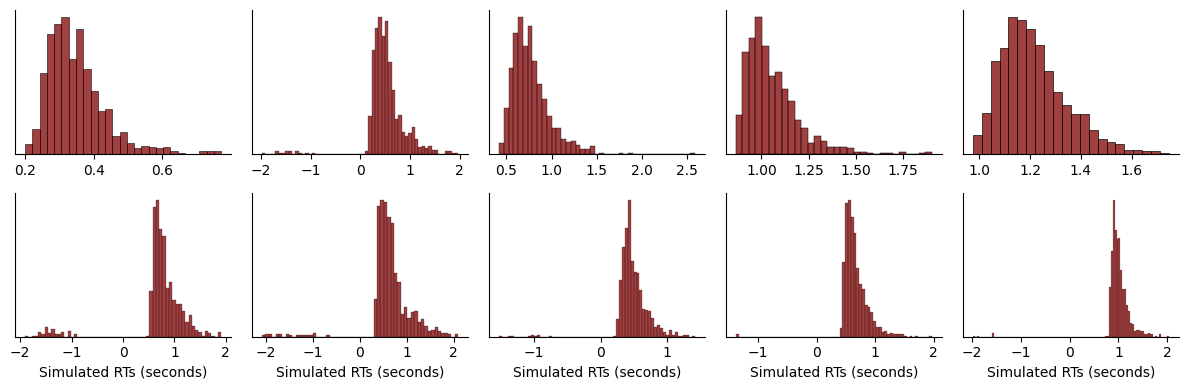

In [8]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [9]:
history = approximator.run(75)

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/1000 [00:00<?, ?it/s]

### Validation

In [7]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [8]:
val_data = model.configure(val_sim)

In [9]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [10]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential no constraint

In [ ]:
model = CollapsingDDM(model_configs['exponential_no_contraint'])
approximator = NeuralApproximator(model)

### Prior Push Forward Check

In [ ]:
%%time
example_sim = model.generate(batch_size=32)

In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

### Train Model

In [ ]:
history = approximator.run(75)

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [15]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [16]:
val_data = model.configure(val_sim)

In [17]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [18]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)

## Exponential ndt constraint

In [10]:
model = CollapsingDDM(model_configs['exponential_ddm_ndt_contraint'])
approximator = NeuralApproximator(model)

INFO:root:Performing 2 pilot runs with the exponential_ddm_ndt_contraint model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 465, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Could not determine shape of simulation non-batchable context. Type appears to be non-array: <class 'int'>,                                    so make sure your input configurator takes cares of that!
INFO:root:No optional simulation batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [ ]:
%%time
example_sim = model.generate(batch_size=32)

In [ ]:
f, axarr = plt.subplots(2, 5, figsize=(12, 4))
for i, ax in enumerate(axarr.flat):
    sns.histplot(example_sim["sim_data"][i, : , 0], color="maroon", alpha=0.75, ax=ax)
    sns.despine(ax=ax)
    ax.set_ylabel("")
    ax.set_yticks([])
    if i > 4:
        ax.set_xlabel("Simulated RTs (seconds)")
f.tight_layout()

In [ ]:
history = approximator.run(75)

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
f = bf.diagnostics.plot_losses(history)

### Validation

In [ ]:
val_sim = model.generate(1000)
true_params = val_sim["prior_draws"]

In [ ]:
val_data = model.configure(val_sim)

In [ ]:
post_samples = approximator.amortizer.sample(val_data, n_samples=2000)

In [ ]:
pred_params = post_samples * model.prior_stds + model.prior_means

In [ ]:
f = bf.diagnostics.plot_recovery(
    pred_params, true_params,
    param_names=model.prior.param_names,
    uncertainty_agg=None
)